In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
)

In [3]:
# data = pd.read_csv("C:\\Users\\ozda2\\OneDrive\\שולחן העבודה\\שנה ג\\פרויקט גמר מדעי הנתונים\\career_change_prediction_dataset.csv")
data = pd.read_csv('C:\\Users\\HP\\Desktop\\career_change_prediction_dataset.csv')

data.head()

,Field of Study,Current Occupation,Age,Gender,Years of Experience,Education Level,Industry Growth Rate,Job Satisfaction,Work-Life Balance,Job Opportunities,...,Skills Gap,Family Influence,Mentorship Available,Certifications,Freelancing Experience,Geographic Mobility,Professional Networks,Career Change Events,Technology Adoption,Likely to Change Occupation
0,Medicine,Business Analyst,48,Male,7,High School,High,7,10,83,...,8,High,0,0,0,1,2,0,1,0
1,Education,Economist,44,Male,26,Master's,Low,10,3,55,...,3,Medium,0,0,1,1,2,1,9,0
2,Education,Biologist,21,Female,27,Master's,Low,8,3,78,...,4,Low,0,0,0,0,2,1,2,0
3,Education,Business Analyst,33,Male,14,PhD,Medium,7,9,62,...,2,Medium,1,0,0,0,9,0,1,0
4,Arts,Doctor,28,Female,0,PhD,Low,3,1,8,...,5,Low,0,0,1,0,2,0,7,1


In [7]:
features = ["Salary", "Job Satisfaction", "Work-Life Balance", "Job Security", "Years of Experience"]
target = "Likely to Change Occupation"


In [8]:
X = data[features].dropna()
y = data.loc[X.index, target]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
# שלב 5: הגדרת מודלים
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

In [12]:
results = []
roc_curves = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba)

    results.append([name, accuracy, precision, recall, auc])
    
    # עקומת ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = (fpr, tpr, auc)


In [13]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "AUC"])
print(results_df)

           Model  Accuracy  Precision    Recall       AUC
0  Random Forest  0.889371   0.986081  0.819808  0.909987
1            KNN  0.854951   0.915846  0.824316  0.902463


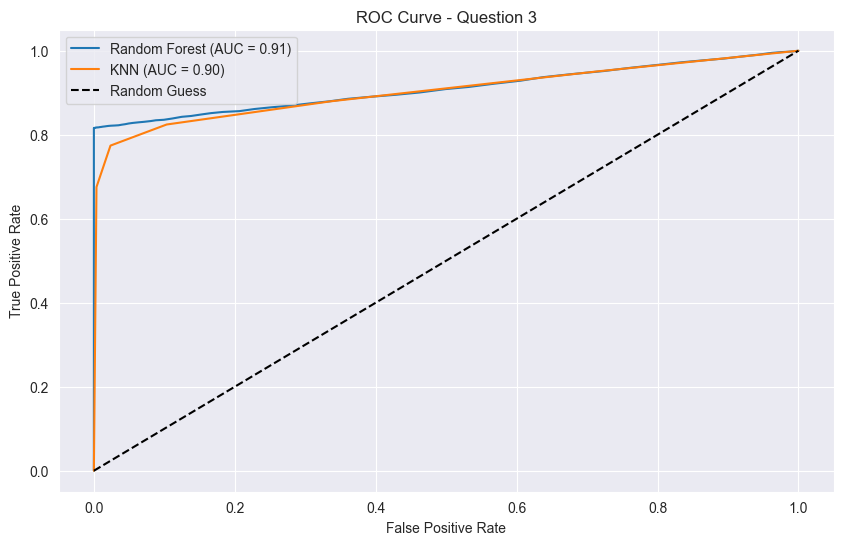

In [14]:
import matplotlib.pyplot as plt

# --- ROC Curve ---
plt.figure(figsize=(10, 6))

for name, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Question 3")
plt.legend()
plt.grid(True)
plt.show()


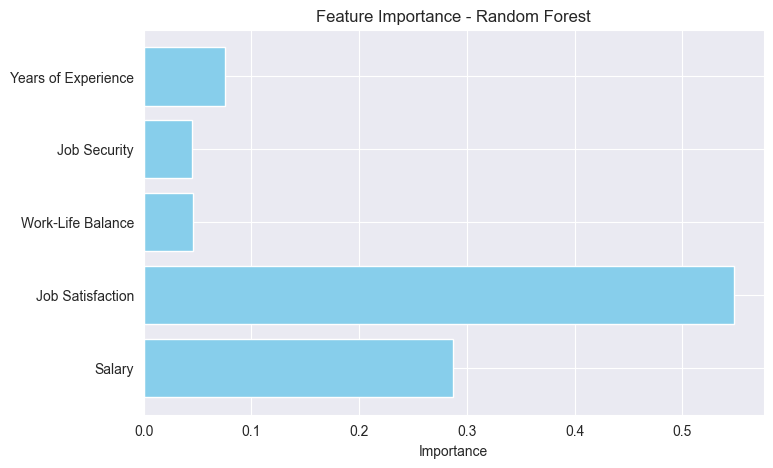

In [15]:
# --- Feature Importance (Random Forest) ---
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color="skyblue")
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.grid(True, axis='x')
plt.show()

 מסקנה מקצועית:
- המודלים שהופעלו (Random Forest, KNN) השיגו דיוק גבוה מאוד עם AUC מעל 0.9.
- Job Satisfaction ו-Work-Life Balance הם המשתנים המשפיעים ביותר.
- Salary תרם פחות לניבוי.
- ניתן לבנות מערכת חיזוי מוקדם על בסיס מדדים פשוטים אלו לזיהוי עובדים שעשויים לעזוב.

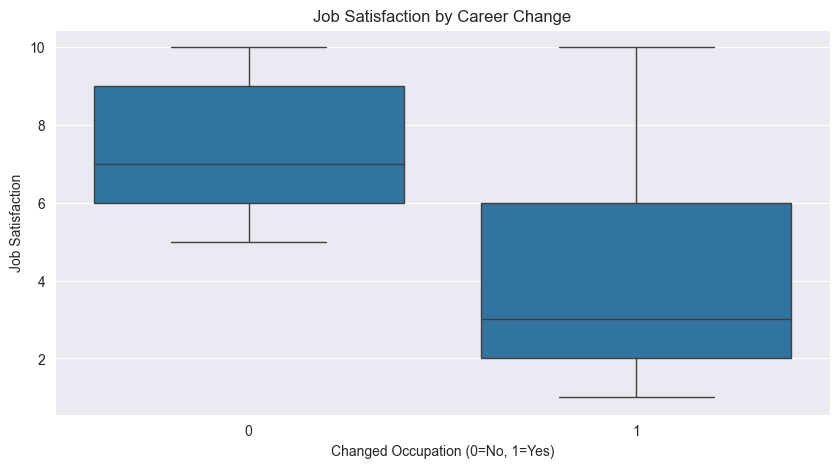

In [17]:
#  Job Satisfaction לפי שינוי קריירה
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Likely to Change Occupation", y="Job Satisfaction")
plt.title("Job Satisfaction by Career Change")
plt.xlabel("Changed Occupation (0=No, 1=Yes)")
plt.ylabel("Job Satisfaction")
plt.show()


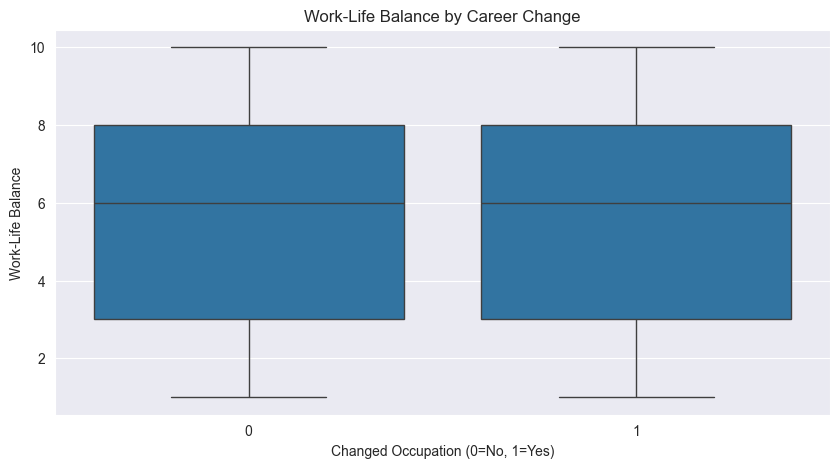

In [18]:
#  גרף 2: Work-Life Balance לפי שינוי קריירה
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Likely to Change Occupation", y="Work-Life Balance")
plt.title("Work-Life Balance by Career Change")
plt.xlabel("Changed Occupation (0=No, 1=Yes)")
plt.ylabel("Work-Life Balance")
plt.show()

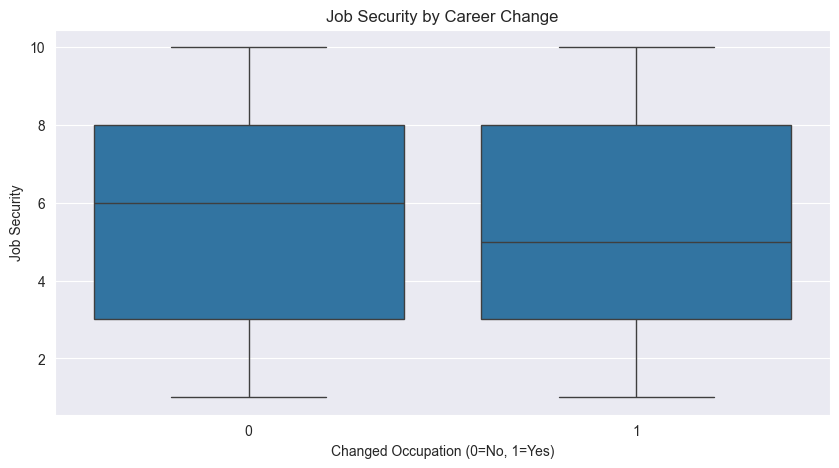

In [19]:
# גרף 3: Job Security לפי שינוי קריירה
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Likely to Change Occupation", y="Job Security")
plt.title("Job Security by Career Change")
plt.xlabel("Changed Occupation (0=No, 1=Yes)")
plt.ylabel("Job Security")
plt.show()


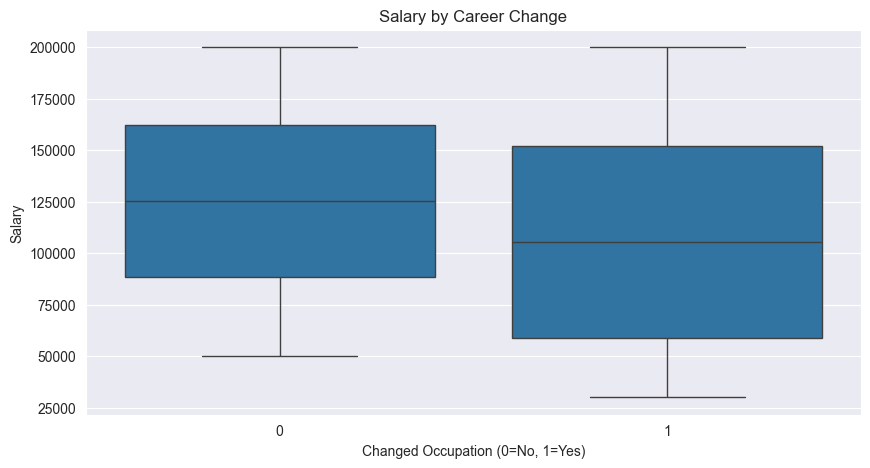

In [21]:
# Salary לפי שינוי קריירה.
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Likely to Change Occupation", y="Salary")
plt.title("Salary by Career Change")
plt.xlabel("Changed Occupation (0=No, 1=Yes)")
plt.ylabel("Salary")
plt.show()


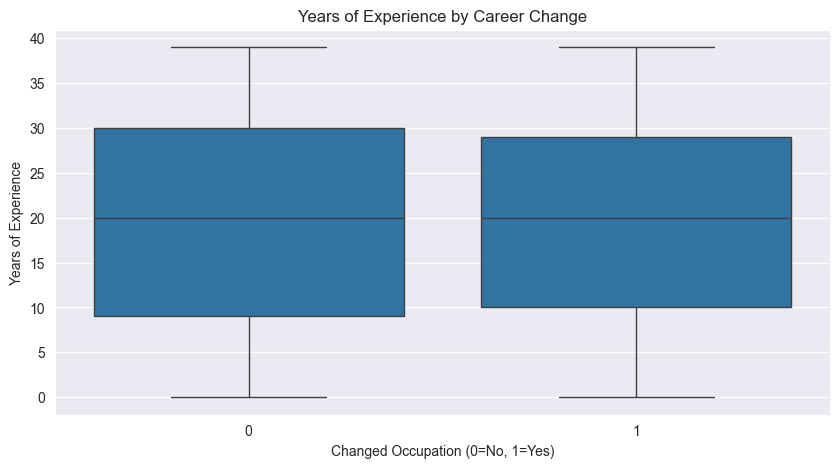

In [22]:
# Years of Experience לפי שינוי קריירה 
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Likely to Change Occupation", y="Years of Experience")
plt.title("Years of Experience by Career Change")
plt.xlabel("Changed Occupation (0=No, 1=Yes)")
plt.ylabel("Years of Experience")
plt.show()
